# Diabetes prediction 

In [1]:
#Importing all the libraries
import pandas as pd 
import numpy as np #  
from sklearn.model_selection import train_test_split #
from sklearn.metrics import mean_squared_error # MSE
from sklearn import metrics 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
#Reading the CSV file and performing data inspection
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Pre-processing

In [3]:
#Checking for null values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#Checking the datatypes of the column

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#checking the column count
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [6]:
#Checking correlations 
corr_mat=df.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


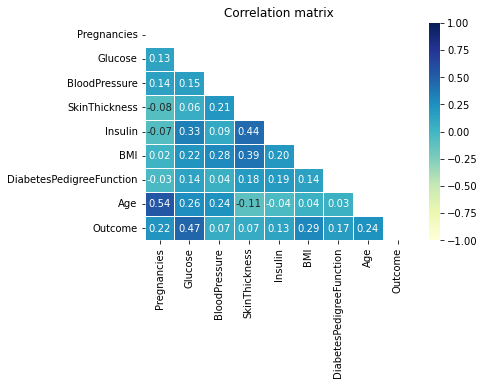

In [36]:
#plot correlation matrix
mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_mat[mask] = np.nan
fig, ax = plt.subplots()
sns.heatmap(corr_mat,vmin=-1,vmax=1,annot=True, linewidth=.5, fmt='.2f',ax=ax, cmap="YlGnBu")
plt.title('Correlation matrix')
plt.show() 

# Creating training and testing data

In [8]:
#Creating X and Y data for train and test split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
#Performing 70/30 train test split on X and y data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=44)

# 1. Logistic Regression

In [10]:
#creating Logistic Regression model and training it with X and y train
LogReg=LogisticRegression(penalty='l2',max_iter=500)
LogReg.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [11]:
#Predicting the outcome on the unknown data 
y_pred=LogReg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

### Model Evaluation

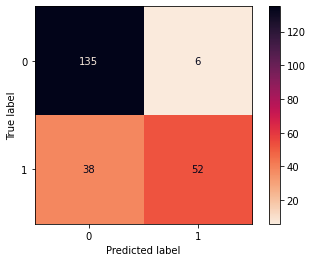

In [12]:
#Printing the confusion matrix
cm1=metrics.confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot(cmap="rocket_r")

plt.show()

In [13]:
lr_acc=accuracy_score(y_test,y_pred)
lr_f1score=f1_score(y_test, y_pred, average="macro")
lr_prec=precision_score(y_test, y_pred, average="macro")
lr_recall=recall_score(y_test, y_pred, average="macro")

In [14]:
#Checking the accuracy, f1-score, precision and recall for the model
print("Accuracy of Logistic Regression: ", lr_acc)
print("F1 score: ",lr_f1score)
print("Precision score: ",lr_prec)
print("Recall score: ",lr_recall)

Accuracy of Logistic Regression:  0.8095238095238095
F1 score:  0.7812876570838354
Precision score:  0.8384492724735898
Recall score:  0.767612293144208


In [15]:
#Mean Squared error of the model
MSE=mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  0.19047619047619047


In [16]:
#Checking the RMSE value
RMSE=np.sqrt(MSE)
print("Root Mean Squared Error: ",RMSE)

Root Mean Squared Error:  0.4364357804719847


# 2. Random Forest

In [17]:
#creating random forest classifier and training it on the training data.

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=200, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)

#predicting the outcome on the unknown data
y_pred2 = random_forest.predict(X_test)

C:\Users\Sharvari Pradhan\Anaconda\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Model Evaluation

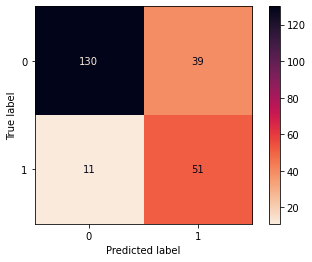

In [18]:
# Constructing the confusion matrix.

cm2 = confusion_matrix(y_pred2, y_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)                            
disp2.plot(cmap="rocket_r")

plt.show()

In [19]:
rf_acc=accuracy_score(y_test,y_pred2)
rf_f1score=f1_score(y_test, y_pred2, average="macro")
rf_prec=precision_score(y_test, y_pred2, average="macro")
rf_recall=recall_score(y_test, y_pred2, average="macro")

In [20]:
print("Accuracy of Random Forest: ",rf_acc)
print("F1 score: ",rf_f1score)
print("Precision score: ",rf_prec)
print("Recall score: ",rf_recall)

Accuracy of Random Forest:  0.7835497835497836
F1 score:  0.7548811544991512
Precision score:  0.7959057071960298
Recall score:  0.7443262411347518


In [21]:
#Mean Squared error of the model
MSE2=mean_squared_error(y_test,y_pred2)
print("Mean Squared Error: ",MSE2)

Mean Squared Error:  0.21645021645021645


In [22]:
#Checking the RMSE value
RMSE2=np.sqrt(MSE2)
print("Root Mean Squared Error: ",RMSE2)

Root Mean Squared Error:  0.4652421051992354


# 3. Naive Bayes

In [23]:
#creating the Naive Bayes classifier and fitting the training data
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [24]:
#Predicting the outcome on the unknown data 
y_pred3 = clf.predict(X_test)

### Model Evaluation 

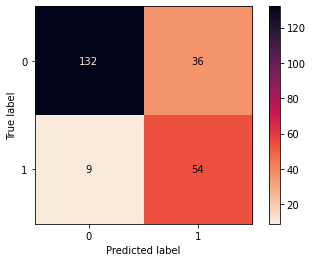

In [25]:
#Confusion matrix for Naive Bayes
cm3 = confusion_matrix(y_pred3, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,
                          display_labels=clf.classes_)
disp.plot(cmap="rocket_r")

plt.show()

In [26]:
nb_acc=accuracy_score(y_test,y_pred3)
nb_f1score=f1_score(y_test, y_pred3, average="macro")
nb_prec=precision_score(y_test, y_pred3, average="macro")
nb_recall=recall_score(y_test, y_pred3, average="macro")

In [27]:
#Accuracy for Naive Bayes
print("Accuracy of Naive Bayes: ",nb_acc)
print("F1 score: ",nb_f1score)
print("Precision score: ",nb_prec)
print("Recall score: ",nb_recall)

Accuracy of Naive Bayes:  0.8051948051948052
F1 score:  0.7801256424900057
Precision score:  0.8214285714285714
Recall score:  0.7680851063829788


In [28]:
#Mean Squared error of the model
MSE3=mean_squared_error(y_test,y_pred3)
print("Mean Squared Error: ",MSE3)

Mean Squared Error:  0.19480519480519481


In [29]:
#Checking the RMSE value
RMSE3=np.sqrt(MSE3)
print("Root Mean Squared Error: ",RMSE3)

Root Mean Squared Error:  0.4413674147523748


# Model Comparison

In [34]:
df2 = pd.DataFrame([['Logistic Regression',lr_acc,lr_f1score,lr_prec,lr_recall],
                    ['Random Forest',rf_acc,rf_f1score,rf_prec,rf_recall], 
                   ['Naive Bayes',nb_acc,nb_f1score,nb_prec,nb_recall]],
                  columns=['Model','Accuracy', 'F1-Score', 'Precision', 'Recall'])

print(df2)
  


                 Model  Accuracy  F1-Score  Precision    Recall
0  Logistic Regression  0.809524  0.781288   0.838449  0.767612
1        Random Forest  0.783550  0.754881   0.795906  0.744326
2          Naive Bayes  0.805195  0.780126   0.821429  0.768085


<AxesSubplot:title={'center':'Comparing the models'}, xlabel='Model', ylabel='Range'>

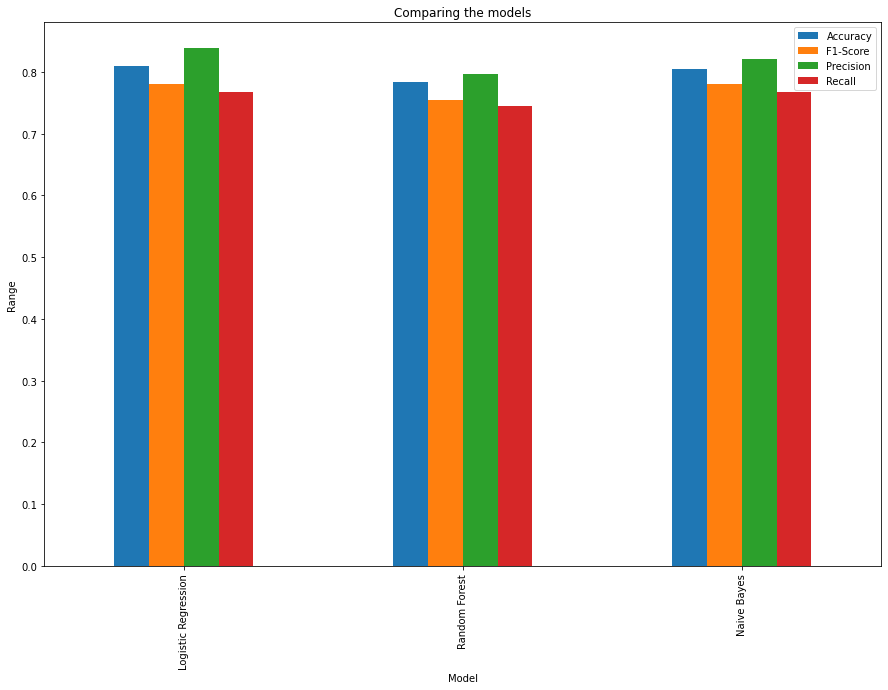

In [35]:
# plot
df2.plot(x='Model',
        kind='bar',
        stacked=False,
         ylabel='Range',
         figsize=(15,10),
        title='Comparing the models')

### From the above plot we can observe that Logistic Regression has the best accuracy for our data closely followed by the Naive Bayes and Random forest model